**first we will have to install tensorflow-gpu==2.1.0.**

In [1]:
import tensorflow as tf
tf.__version__

2024-05-26 04:46:48.907533: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-26 04:46:48.907678: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-26 04:46:49.055491: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


'2.15.0'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X=df.iloc[:,3:13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
y=df.iloc[:,13]


In [6]:
dummies=pd.get_dummies(X['Geography'],drop_first=True)
X=pd.concat([X,dummies],axis=1)
X.drop('Geography',axis=1,inplace=True)

In [7]:
dummies=pd.get_dummies(X['Gender'],drop_first=True)
X=pd.concat([X,dummies],axis=1)
X.drop('Gender',axis=1,inplace=True)

In [8]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [11]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,PReLU,ELU,LeakyReLU
from tensorflow.keras.layers import Dropout

In [13]:
X.shape

(10000, 11)

**Now lets create the model step by step**

In [14]:
classifier=Sequential()

In [15]:
classifier.add(Dense(units=11,activation='relu'))

In [16]:
classifier.add(Dense(units=7,activation='relu'))

In [17]:
classifier.add(Dense(units=6,activation='relu'))

In [18]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [19]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=.01)

In [20]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
import tensorflow
early_stopping=tensorflow.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False

)

In [22]:
model_history=classifier.fit(X_train,y_train,validation_split=.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7855 - loss: 0.4764 - val_accuracy: 0.8527 - val_loss: 0.3710
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8353 - loss: 0.3879 - val_accuracy: 0.8546 - val_loss: 0.3667
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8572 - loss: 0.3628 - val_accuracy: 0.8550 - val_loss: 0.3519
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8550 - loss: 0.3608 - val_accuracy: 0.8569 - val_loss: 0.3518
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8533 - loss: 0.3669 - val_accuracy: 0.8493 - val_loss: 0.3527
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8534 - loss: 0.3554 - val_accuracy: 0.8607 - val_loss: 0.3393
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8625 - loss: 0.3460 - val_accuracy: 0.8607 - val_loss: 0.3479
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8646 - loss: 0.3505 - 

In [23]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**plotting**

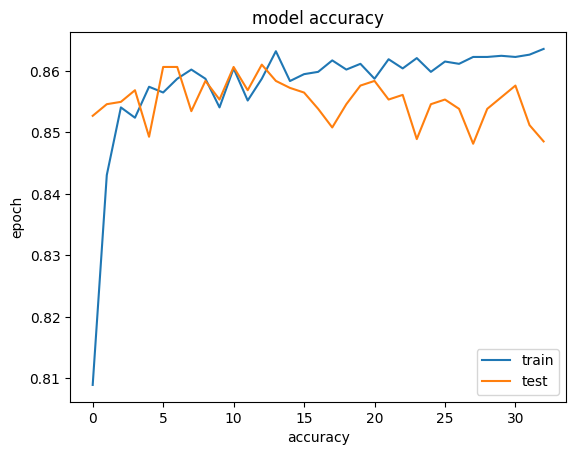

In [24]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("model accuracy")
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'])
plt.show()

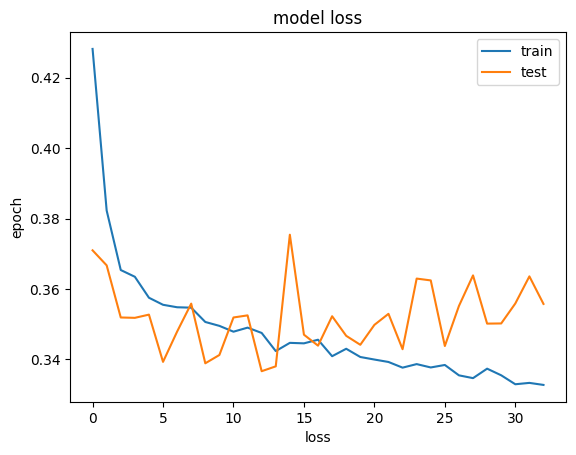

In [25]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("model loss")
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'])
plt.show()

In [26]:
y_pred=classifier.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [27]:
len(y_pred)

2000

In [28]:
y_pred=(y_pred>=.5)

In [29]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
cm=confusion_matrix(y_test,y_pred)

In [32]:
import seaborn as sns

<Axes: >

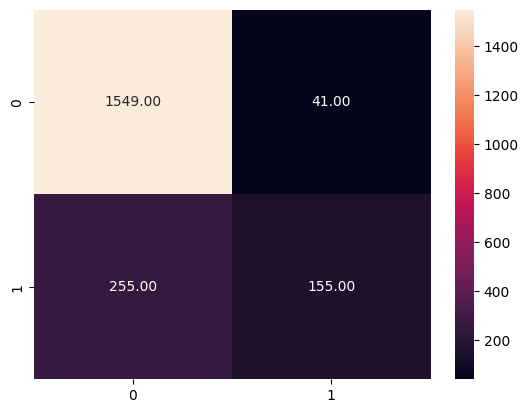

In [33]:
sns.heatmap(cm,fmt='.2f',annot=True)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.852

**weightage**

In [35]:
classifier.get_weights()

[array([[ 2.7751529e-01, -2.6874369e-01,  4.9975622e-01,  1.3866009e-01,
          6.3164884e-01,  9.3211025e-02,  1.8796160e+00,  4.1567639e-01,
          4.3167374e-01, -2.8729260e-01, -6.8308324e-02],
        [ 1.3628854e+00, -8.3934712e-01, -3.2932568e+00,  5.0487930e-01,
         -1.8567349e+00, -3.1308708e+00,  3.3878502e-01,  2.6068020e-01,
         -3.5372764e-01, -1.0120165e+00,  1.9773192e+00],
        [-7.0175879e-02,  1.5385537e-01, -3.1511029e-03, -2.8229034e-01,
         -7.2367258e-02, -1.8769227e-01, -4.1594231e-01, -3.0685514e-01,
          1.7667772e+00,  7.6203310e-01,  1.1012344e+00],
        [ 9.5416434e-02,  3.8537332e-01,  3.7000364e-01, -5.8081263e-01,
          2.5851691e-01, -9.6456301e-01, -1.5401084e+00, -2.7405131e+00,
          3.6082301e-01,  1.6338010e+00, -1.5243340e+00],
        [ 1.5551869e+00,  2.7551172e+00, -3.9991614e-01, -2.5604179e+00,
         -7.6703840e-01,  3.9579633e-01, -7.6935405e-01, -2.7889662e+00,
          6.3951534e-01,  1.7377670e+0